In [2]:
#imported anything that may be useful
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [4]:
#initial issue displaying data copied full path and changed \ to / in path to make it read
fifa_df = pd.read_csv('C:/Users/hurt1/OneDrive/Desktop/DataDivers_Group_Repo/In_Work_ZH/fifa_world_cup.csv')

In [6]:
#initial pull shows the data is not presented in a way to easily draw conclusions, will need to process further
fifa_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [8]:
#starting by showing the columns and datatypes to determine how to make changes to data
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [10]:
#attempting to see if anything pops out looking at totals and stats
fifa_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [16]:
#determining how many actual home teams are listed
fifa_df['home_team'].count()

23921

In [32]:
#listing home teams by name 
fifa_df['home_team']

0               Bolivia
1                Brazil
2               Ecuador
3                Guinea
4              Paraguay
              ...      
23916           Moldova
23917     Liechtenstein
23918             Chile
23919             Japan
23920    Korea Republic
Name: home_team, Length: 23921, dtype: object

In [50]:
#checking datatypes 
fifa_df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [52]:
#this isnt very helpful
fifa_df.shape

(23921, 25)

C:\Users\hurt1\AppData\Local\Temp\ipykernel_10200\2201870201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=fifa_df['home_team_fifa_rank']);


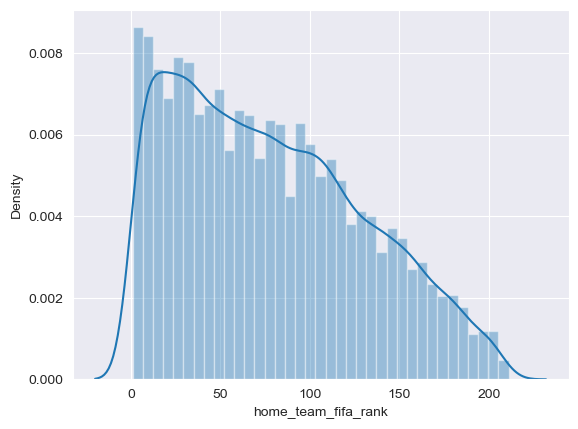

In [56]:
#have to figure out how to make a meaningful distplot, this is just a practice run
sns.set_style('darkgrid')
sns.distplot(a=fifa_df['home_team_fifa_rank']);

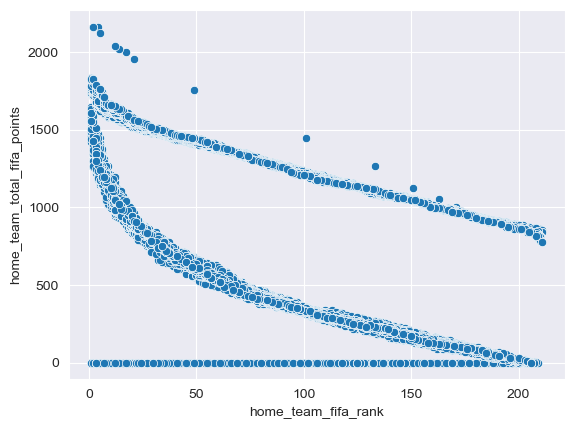

In [58]:
#there may be a way to make this effective at displaying data need to work further and find a way to show only top 10
sns.scatterplot(x=fifa_df['home_team_fifa_rank'], y=fifa_df['home_team_total_fifa_points']);

In [63]:
fifa_df.loc[:, ['home_team', 'home_team_fifa_rank', 'home_team_total_fifa_points']]
#top_10_home_teams = fifa_df['home_team_fifa_points'].nlargest(10)

,home_team,home_team_fifa_rank,home_team_total_fifa_points
0,Bolivia,59,0
1,Brazil,8,0
2,Ecuador,35,0
3,Guinea,65,0
4,Paraguay,67,0
...,...,...,...
23916,Moldova,180,932
23917,Liechtenstein,192,895
23918,Chile,28,1526
23919,Japan,23,1553


In [102]:
top_10_home_teams_scores = fifa_df['home_team_total_fifa_points'].nlargest(10) 
top_10_home_teams_scores

20446    2164
20449    2164
20437    2160
20443    2160
20438    2124
20448    2124
20436    2036
20447    2036
20442    2017
20440    1998
Name: home_team_total_fifa_points, dtype: int64

In [104]:
fifa_df['home_team_total_fifa_points'] >= 1998

0        False
1        False
2        False
3        False
4        False
         ...  
23916    False
23917    False
23918    False
23919    False
23920    False
Name: home_team_total_fifa_points, Length: 23921, dtype: bool

In [106]:
fifa_df[fifa_df['home_team_total_fifa_points'] >= 1998]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
20436,2018-07-01,Croatia,Denmark,Europe,Europe,12,15,2036,2014,1,...,Yes,Win,85.0,83.0,80.8,79.3,85.8,79.5,77.3,81.0
20437,2018-07-02,Brazil,Mexico,South America,North America,4,10,2160,2041,2,...,No,Win,83.0,79.0,86.8,87.0,83.8,77.8,81.0,80.0
20438,2018-07-02,Belgium,Japan,Europe,Asia,5,41,2124,1816,3,...,No,Win,89.0,72.0,83.5,87.3,85.8,75.2,76.7,78.8
20440,2018-07-03,Colombia,England,South America,Europe,17,7,1998,2099,1,...,Yes,Lose,79.0,82.0,78.8,82.0,80.5,82.8,83.3,82.8
20442,2018-07-06,Uruguay,France,South America,Europe,14,2,2017,2164,0,...,No,Lose,82.0,88.0,82.5,85.3,78.0,84.0,86.3,86.2
20443,2018-07-06,Brazil,Belgium,South America,Europe,4,5,2160,2124,1,...,No,Lose,83.0,89.0,86.8,87.0,83.8,83.5,87.3,85.8
20446,2018-07-10,France,Belgium,Europe,Europe,2,5,2164,2124,1,...,No,Win,88.0,89.0,84.0,86.3,86.2,83.5,87.3,85.8
20447,2018-07-11,Croatia,England,Europe,Europe,12,7,2036,2099,2,...,No,Win,85.0,82.0,80.8,79.3,85.8,82.8,83.3,82.8
20448,2018-07-14,Belgium,England,Europe,Europe,5,7,2124,2099,2,...,No,Win,89.0,82.0,83.5,87.3,85.8,82.8,83.3,82.8
20449,2018-07-15,France,Croatia,Europe,Europe,2,12,2164,2036,4,...,No,Win,88.0,85.0,84.0,86.3,86.2,80.8,79.3,85.8


In [111]:
top_ten_home_teams_by_points = fifa_df[fifa_df['home_team_total_fifa_points'] >= 1998]
top_ten_home_teams_by_points

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
20436,2018-07-01,Croatia,Denmark,Europe,Europe,12,15,2036,2014,1,...,Yes,Win,85.0,83.0,80.8,79.3,85.8,79.5,77.3,81.0
20437,2018-07-02,Brazil,Mexico,South America,North America,4,10,2160,2041,2,...,No,Win,83.0,79.0,86.8,87.0,83.8,77.8,81.0,80.0
20438,2018-07-02,Belgium,Japan,Europe,Asia,5,41,2124,1816,3,...,No,Win,89.0,72.0,83.5,87.3,85.8,75.2,76.7,78.8
20440,2018-07-03,Colombia,England,South America,Europe,17,7,1998,2099,1,...,Yes,Lose,79.0,82.0,78.8,82.0,80.5,82.8,83.3,82.8
20442,2018-07-06,Uruguay,France,South America,Europe,14,2,2017,2164,0,...,No,Lose,82.0,88.0,82.5,85.3,78.0,84.0,86.3,86.2
20443,2018-07-06,Brazil,Belgium,South America,Europe,4,5,2160,2124,1,...,No,Lose,83.0,89.0,86.8,87.0,83.8,83.5,87.3,85.8
20446,2018-07-10,France,Belgium,Europe,Europe,2,5,2164,2124,1,...,No,Win,88.0,89.0,84.0,86.3,86.2,83.5,87.3,85.8
20447,2018-07-11,Croatia,England,Europe,Europe,12,7,2036,2099,2,...,No,Win,85.0,82.0,80.8,79.3,85.8,82.8,83.3,82.8
20448,2018-07-14,Belgium,England,Europe,Europe,5,7,2124,2099,2,...,No,Win,89.0,82.0,83.5,87.3,85.8,82.8,83.3,82.8
20449,2018-07-15,France,Croatia,Europe,Europe,2,12,2164,2036,4,...,No,Win,88.0,85.0,84.0,86.3,86.2,80.8,79.3,85.8


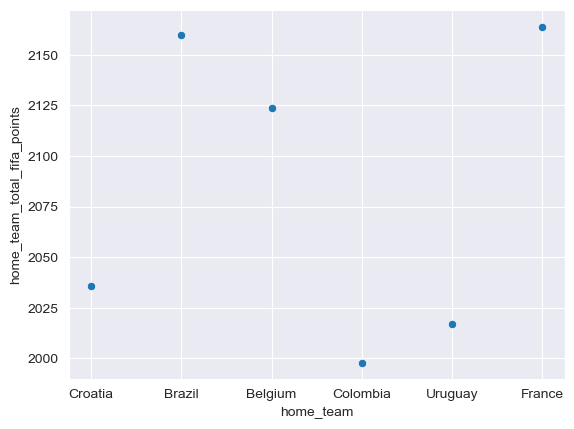

In [113]:
#this data reflects total points in top 10 by home team, same teams show up multiple times 
#this may be used to contrast against rankings
sns.scatterplot(x=top_ten_home_teams_by_points['home_team'], y=top_ten_home_teams_by_points['home_team_total_fifa_points']);

In [71]:
#this is interesting as there are clearly duplicates the list dropped from 23921 to 18998 
#I dont know if that is important yet or not
fifa_country = fifa_df['home_team'].drop_duplicates()
fifa_country

0               Bolivia
1                Brazil
2               Ecuador
3                Guinea
4              Paraguay
              ...      
11264    Chinese Taipei
14359           Curaçao
15559       South Sudan
18928            Kosovo
18998         Gibraltar
Name: home_team, Length: 211, dtype: object

In [79]:
#just realized i cant see all columns so i need to figure that out
fifa_df.drop_duplicates(subset=['home_team'], keep='first')

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,2008-04-04,Chinese Taipei,Guam,Asia,Asia,171,202,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14359,2011-09-06,Curaçao,Haiti,North America,North America,166,116,103,259,2,...,No,Lose,NaN,70.0,NaN,NaN,NaN,65.5,NaN,60.8
15559,2012-11-27,South Sudan,Kenya,Africa,Africa,200,130,19,247,0,...,No,Lose,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN
18928,2016-10-06,Kosovo,Croatia,Europe,Europe,168,14,134,1059,0,...,No,Lose,72.0,83.0,67.0,72.7,71.8,81.0,80.0,84.5


In [123]:
fifa_df.drop_duplicates(subset=['home_team_fifa_rank'], keep='first')
fifa_df.drop_duplicates(subset=['home_team'], keep='first')

top_ten_home_teams_by_rank = fifa_df[fifa_df['home_team_fifa_rank'] <= 10]
top_ten_home_teams_by_rank

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1993-08-22,Argentina,Peru,South America,South America,5,70,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,1993-08-22,Brazil,Ecuador,South America,South America,8,35,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1993-08-22,Sweden,France,Europe,Europe,4,12,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23854,2022-06-11,Netherlands,Poland,Europe,Europe,10,26,1658,1544,2,...,No,Draw,81.0,87.0,85.2,83.0,83.5,75.2,84.7,75.8
23866,2022-06-12,Spain,Czech Republic,Europe,Europe,7,33,1709,1500,2,...,No,Win,84.0,81.0,86.5,85.0,86.0,77.8,76.7,78.5
23885,2022-06-13,France,Croatia,Europe,Europe,3,16,1789,1621,0,...,No,Lose,87.0,82.0,84.2,88.3,86.8,77.8,76.7,84.2
23906,2022-06-14,England,Hungary,Europe,Europe,5,40,1761,1466,0,...,No,Lose,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0


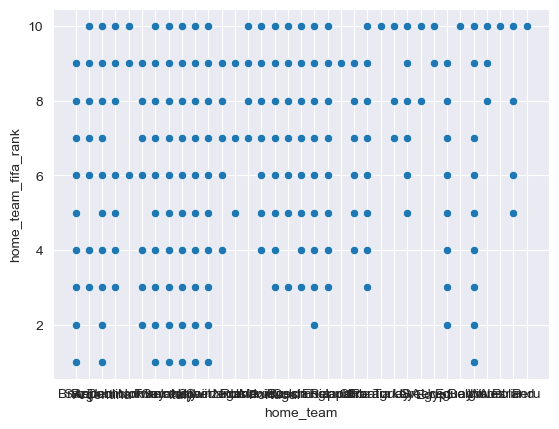

In [121]:
#well that didnt work, need to slim down the list but too many ranks are shared 
sns.scatterplot(x=top_ten_home_teams_by_rank['home_team'], y=top_ten_home_teams_by_rank['home_team_fifa_rank']);

In [125]:
fifa_df['year'] = pd.to_datetime(fifa_df['date']).dt.year
fifa_df['year']

0        1993
1        1993
2        1993
3        1993
4        1993
         ... 
23916    2022
23917    2022
23918    2022
23919    2022
23920    2022
Name: year, Length: 23921, dtype: int32

In [152]:
year = 2022
fifa_2022_df = fifa_df[fifa_df['year'] == year]
fifa_2022_df


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
23350,2022-01-02,Gabon,Burkina Faso,Africa,Africa,89,60,1262,1397,0,...,Lose,NaN,73.0,68.8,NaN,74.0,69.5,71.7,67.0,2022
23351,2022-01-02,Sudan,Zimbabwe,Africa,Africa,125,121,1131,1138,0,...,Draw,NaN,NaN,NaN,62.3,NaN,65.0,72.3,NaN,2022
23352,2022-01-03,Rwanda,Guinea,Africa,Africa,135,81,1095,1298,3,...,Win,NaN,69.0,NaN,NaN,NaN,70.5,73.3,75.0,2022
23353,2022-01-04,Mauritania,Gabon,Africa,Africa,103,89,1190,1262,1,...,Draw,NaN,NaN,NaN,NaN,NaN,68.8,NaN,74.0,2022
23354,2022-01-05,Algeria,Ghana,Africa,Africa,29,52,1516,1428,3,...,Win,78.0,74.0,78.0,81.0,78.0,75.5,76.0,78.2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2022
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,2022
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0,2022


In [156]:
fifa_2022_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,329.000000,302.000000,303.000000,330.000000,321.000000,279.000000,323.000000,303.000000,571.0
mean,86.971979,93.697023,1296.262697,1267.250438,1.523643,0.954466,74.376900,74.019868,74.891089,75.484242,75.367601,74.215412,74.479257,74.855446,2022.0
std,57.388696,56.176392,243.099570,234.815766,1.435411,1.133862,8.200845,8.475464,5.247865,6.459290,5.569432,5.079378,6.367428,5.545080,0.0
min,1.000000,1.000000,776.000000,776.000000,0.000000,0.000000,51.000000,51.000000,61.000000,55.000000,63.000000,61.000000,55.000000,63.000000,2022.0
25%,36.000000,46.500000,1118.000000,1084.000000,0.000000,0.000000,69.000000,69.000000,71.500000,71.700000,70.800000,70.200000,70.700000,70.000000,2022.0
50%,81.000000,87.000000,1293.000000,1267.000000,1.000000,1.000000,75.000000,74.000000,75.000000,76.000000,75.800000,74.500000,74.000000,75.000000,2022.0
75%,132.000000,138.000000,1479.500000,1450.000000,2.000000,1.000000,80.000000,80.000000,77.800000,80.000000,78.500000,77.200000,78.700000,78.200000,2022.0
max,211.000000,211.000000,1828.000000,1832.000000,9.000000,10.000000,91.000000,91.000000,86.500000,89.000000,87.800000,86.500000,89.000000,87.800000,2022.0


In [150]:
year = 2021
fifa_2021_df = fifa_df[fifa_df['year'] == year]
fifa_2021_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
22273,2021-01-12,United Arab Emirates,Iraq,Asia,Asia,74,69,1326,1347,0,...,Draw,71.0,NaN,65.2,NaN,68.0,NaN,NaN,NaN,2021
22274,2021-01-18,Kuwait,Palestine,Asia,Asia,148,102,1060,1204,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
22275,2021-01-19,Dominican Republic,Puerto Rico,North America,North America,159,179,1019,941,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
22276,2021-01-22,Guatemala,Puerto Rico,North America,North America,131,179,1111,941,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
22277,2021-01-25,Dominican Republic,Serbia,North America,Europe,159,30,1019,1495,0,...,Draw,NaN,81.0,NaN,NaN,NaN,79.0,80.0,82.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23345,2021-12-18,Tunisia,Algeria,Africa,Africa,29,32,1512,1508,0,...,Lose,NaN,78.0,70.8,72.3,74.0,78.0,81.0,78.0,2021
23346,2021-12-18,USA,Bosnia and Herzegovina,North America,Europe,12,61,1647,1392,1,...,Win,77.0,76.0,75.8,77.7,75.8,74.2,77.0,78.0,2021
23347,2021-12-30,Mauritania,Burkina Faso,Africa,Africa,103,60,1190,1397,0,...,Draw,NaN,73.0,NaN,NaN,NaN,69.5,71.7,67.0,2021
23348,2021-12-30,Sudan,Ethiopia,Africa,Africa,125,137,1131,1087,2,...,Lose,NaN,NaN,NaN,62.3,NaN,NaN,NaN,NaN,2021


In [158]:
fifa_2021_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,660.000000,602.000000,634.000000,657.000000,663.000000,581.000000,626.000000,619.000000,1077.0
mean,75.933148,84.116992,1337.155060,1302.502321,1.634169,1.095636,76.192424,75.466777,75.494006,76.238052,76.118100,74.615146,74.821885,75.201939,2021.0
std,54.392686,54.937691,227.279599,226.215628,1.706064,1.374607,7.791728,7.902045,5.496257,6.425825,5.797049,5.520152,6.372377,5.997127,0.0
min,1.000000,1.000000,782.000000,782.000000,0.000000,0.000000,51.000000,51.000000,60.000000,55.000000,60.000000,60.000000,55.000000,60.000000,2021.0
25%,29.000000,40.000000,1161.000000,1143.000000,0.000000,0.000000,71.000000,70.000000,71.500000,72.000000,72.800000,71.000000,70.700000,70.800000,2021.0
50%,68.000000,78.000000,1355.000000,1313.000000,1.000000,1.000000,76.000000,75.000000,75.500000,76.700000,76.500000,75.000000,74.700000,75.500000,2021.0
75%,114.000000,123.000000,1509.000000,1461.000000,2.000000,2.000000,82.000000,81.000000,78.800000,81.000000,79.800000,78.000000,78.700000,78.750000,2021.0
max,210.000000,210.000000,1832.000000,1832.000000,14.000000,11.000000,91.000000,91.000000,86.800000,90.000000,87.800000,86.800000,90.000000,87.800000,2021.0


In [154]:
year = 2020
fifa_2020_df = fifa_df[fifa_df['year'] == year]
fifa_2020_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
21975,2020-01-07,Barbados,Canada,North America,North America,162,73,1011,1331,1,...,Lose,NaN,74.0,NaN,NaN,NaN,67.8,73.0,74.0,2020
21976,2020-01-09,Moldova,Sweden,Europe,Europe,175,17,959,1579,0,...,Lose,70.0,78.0,66.8,NaN,63.5,77.8,79.3,77.8,2020
21977,2020-01-10,Barbados,Canada,North America,North America,162,73,1011,1331,1,...,Lose,NaN,74.0,NaN,NaN,NaN,67.8,73.0,74.0,2020
21978,2020-01-12,Kosovo,Sweden,Europe,Europe,115,17,1174,1579,0,...,Lose,67.0,78.0,71.0,74.7,73.8,77.8,79.3,77.8,2020
21979,2020-01-15,Canada,Iceland,North America,Europe,73,39,1331,1464,0,...,Lose,74.0,70.0,67.8,73.0,74.0,72.8,74.3,76.2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22268,2020-11-18,Greece,Slovenia,Europe,Europe,54,62,1408,1376,0,...,Draw,81.0,91.0,78.2,72.7,76.2,72.0,78.3,76.5,2020
22269,2020-11-18,Albania,Belarus,Europe,Europe,69,90,1345,1273,3,...,Win,83.0,NaN,75.5,68.7,70.2,NaN,NaN,NaN,2020
22270,2020-11-18,Kazakhstan,Lithuania,Europe,Europe,119,130,1153,1105,1,...,Lose,NaN,74.0,NaN,NaN,68.5,60.0,61.7,NaN,2020
22271,2020-12-04,Qatar,Bangladesh,Asia,Asia,59,184,1387,920,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [160]:
fifa_2020_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,229.000000,217.000000,229.000000,222.000000,237.000000,208.000000,212.000000,218.000000,298.0
mean,62.520134,67.520134,1388.432886,1366.255034,1.429530,1.040268,77.820961,77.110599,75.683843,76.205405,76.404219,75.745673,75.814151,76.158257,2020.0
std,50.325552,51.926728,210.290045,212.839601,1.448348,1.024147,7.128415,6.854083,5.670070,6.326585,6.259148,5.398719,5.955633,6.099086,0.0
min,1.000000,1.000000,812.000000,811.000000,0.000000,0.000000,58.000000,58.000000,60.000000,61.700000,60.000000,60.000000,61.700000,60.000000,2020.0
25%,22.000000,25.250000,1253.250000,1215.000000,0.000000,0.000000,73.000000,72.000000,72.000000,72.075000,72.000000,72.200000,72.000000,72.500000,2020.0
50%,50.000000,54.000000,1426.500000,1408.500000,1.000000,1.000000,77.000000,77.000000,75.500000,76.300000,76.800000,76.250000,75.300000,76.800000,2020.0
75%,94.500000,101.000000,1543.500000,1514.500000,2.000000,2.000000,83.000000,82.000000,79.000000,80.000000,80.500000,78.800000,79.300000,80.000000,2020.0
max,210.000000,210.000000,1773.000000,1773.000000,7.000000,5.000000,91.000000,91.000000,86.800000,90.000000,87.000000,86.800000,90.000000,87.000000,2020.0


In [170]:
fifa_yearly_df = {year:fifa_df[fifa_df['year'] == year] for year in fifa_df['year'].unique()}
print(fifa_yearly_df[1993])

           date home_team      away_team home_team_continent  \
0    1993-08-08   Bolivia        Uruguay       South America   
1    1993-08-08    Brazil         Mexico       South America   
2    1993-08-08   Ecuador      Venezuela       South America   
3    1993-08-08    Guinea   Sierra Leone              Africa   
4    1993-08-08  Paraguay      Argentina       South America   
..          ...       ...            ...                 ...   
166  1993-12-18       USA        Germany       North America   
167  1993-12-19      Mali  Côte d'Ivoire              Africa   
168  1993-12-22    Mexico        Germany       North America   
169  1993-12-29     Ghana          Egypt              Africa   
170  1993-12-31     Ghana        Tunisia              Africa   

    away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
0         South America                   59                   22   
1         North America                    8                   14   
2         South America 

In [172]:
fifa_yearly_df[1993]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1993-12-18,USA,Germany,North America,Europe,27,3,0,0,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
167,1993-12-19,Mali,Côte d'Ivoire,Africa,Africa,75,34,0,0,0,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
168,1993-12-22,Mexico,Germany,North America,Europe,17,3,0,0,0,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
169,1993-12-29,Ghana,Egypt,Africa,Africa,37,26,0,0,0,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


AttributeError: 'DataFrame' object has no attribute 'desribe'